# Create Dataset

## Create basic Params
Creating the basic dataset attributes.

In [1]:
folder_name = 'ikea_drill_screw'
TRAIN_COUNT = 800
VAL_COUNT = 200
IMAGE_SIZE = 512
INPUT_PATH = '../datasets/{}/input'.format(folder_name)
VAL_PATH = '../datasets/{}/val'.format(folder_name)
TRAIN_PATH = '../datasets/{}/train'.format(folder_name)
DI_PATH = INPUT_PATH + '/dataset_info.json'

## Create Training Set

In [2]:
MASK_DEF_PATH = TRAIN_PATH + '/mask_definitions.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {TRAIN_PATH} --count {TRAIN_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}

../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Create Validation Set

In [3]:
MASK_DEF_PATH = VAL_PATH + '/mask_definitions.json'
DI_PATH = INPUT_PATH + '/dataset_info.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {VAL_PATH} --count {VAL_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}


../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Preview the generated datasets

In [4]:
import os
import sys
import numpy as np
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library
from src import coco_trainer
from mrcnn import visualize


dataset_train = coco_trainer.CocoLikeDataset()
dataset_train.load_data(TRAIN_PATH+'/coco_instances.json',TRAIN_PATH+'/images')
dataset_train.prepare()

dataset_val = coco_trainer.CocoLikeDataset()
dataset_val.load_data(VAL_PATH+'/coco_instances.json',VAL_PATH+'/images')
dataset_val.prepare()

Using TensorFlow backend.


Displaying examples from training dataset:


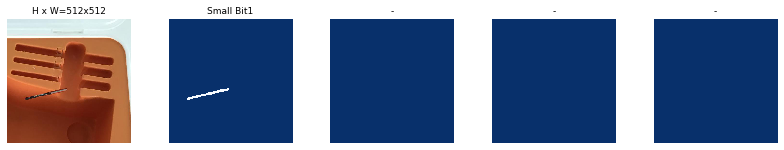

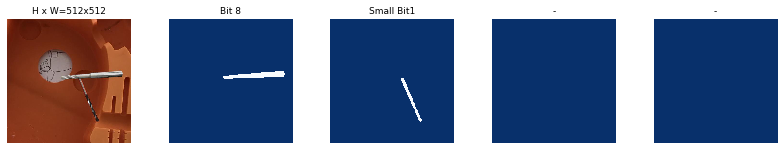

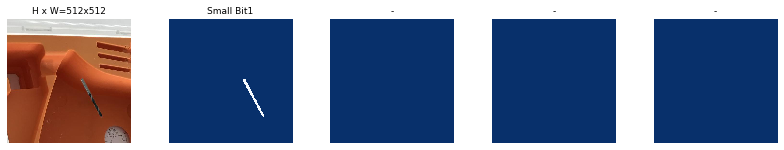

Displaying examples from validation dataset:


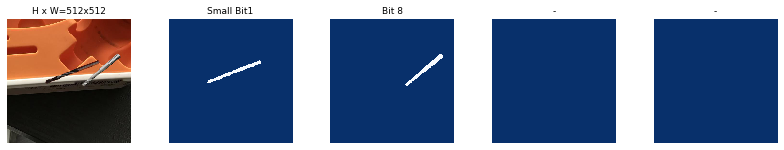

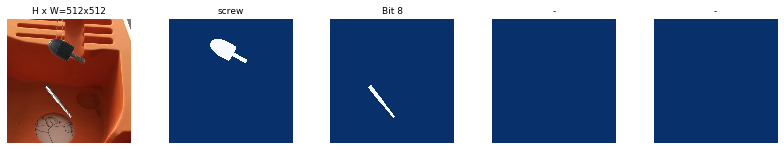

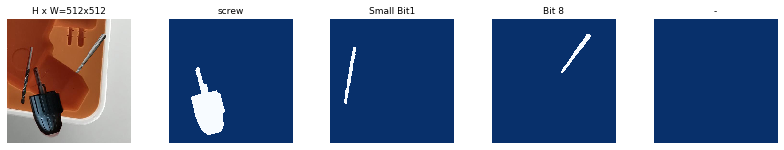

In [5]:
for name, dataset in [('training', dataset_train), ('validation', dataset_val)]:
    print(f'Displaying examples from {name} dataset:')
    
    image_ids = np.random.choice(dataset.image_ids, 3)
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Sync to S3

In [6]:
!aws s3 sync ../datasets s3://dkitdatasets --delete

upload: ../datasets/ikea_drill_screw/train/images/00000000.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000000.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000001.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000001.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000004.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000004.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000003.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000003.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000002.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000002.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000008.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000008.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000006.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000006.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000005.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000056.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000056.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000064.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000064.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000067.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000067.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000065.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000065.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000069.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000069.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000072.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000072.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000070.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000070.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000073.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000132.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000132.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000131.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000131.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000134.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000134.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000135.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000135.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000136.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000136.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000139.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000139.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000140.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000140.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000138.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000198.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000198.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000197.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000197.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000201.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000201.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000200.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000200.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000203.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000203.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000202.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000202.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000199.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000199.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000204.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000249.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000249.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000266.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000266.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000259.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000259.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000269.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000269.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000268.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000268.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000265.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000265.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000264.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000264.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000271.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000331.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000331.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000328.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000328.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000296.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000296.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000334.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000334.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000335.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000335.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000333.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000333.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000330.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000330.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000332.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000396.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000396.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000400.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000400.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000398.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000398.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000395.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000395.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000399.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000399.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000401.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000401.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000405.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000405.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000403.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000461.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000461.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000457.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000457.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000454.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000454.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000460.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000460.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000467.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000467.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000464.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000464.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000466.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000466.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000463.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000522.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000522.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000524.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000524.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000528.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000528.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000529.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000529.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000530.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000530.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000531.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000531.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000532.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000532.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000534.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000585.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000585.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000586.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000586.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000587.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000587.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000591.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000591.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000588.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000588.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000590.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000590.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000592.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000592.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000594.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000656.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000656.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000651.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000651.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000646.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000646.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000657.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000657.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000655.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000655.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000661.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000661.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000658.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000658.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000662.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000723.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000723.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000722.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000722.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000720.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000720.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000721.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000721.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000714.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000714.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000725.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000725.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000726.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000726.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000729.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000785.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000785.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000764.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000764.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000788.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000788.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000791.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000791.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000787.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000787.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000790.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000790.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000789.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000789.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000792.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/masks/00000040.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000040.png
upload: ../datasets/ikea_drill_screw/train/masks/00000052.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000052.png
upload: ../datasets/ikea_drill_screw/train/masks/00000047.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000047.png
upload: ../datasets/ikea_drill_screw/train/masks/00000054.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000054.png
upload: ../datasets/ikea_drill_screw/train/masks/00000050.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000050.png
upload: ../datasets/ikea_drill_screw/train/masks/00000053.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000053.png
upload: ../datasets/ikea_drill_screw/train/masks/00000055.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000055.png
upload: ../datasets/ikea_drill_screw/train/masks/00000051.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000051.png


upload: ../datasets/ikea_drill_screw/train/masks/00000116.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000116.png
upload: ../datasets/ikea_drill_screw/train/masks/00000114.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000114.png
upload: ../datasets/ikea_drill_screw/train/masks/00000115.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000115.png
upload: ../datasets/ikea_drill_screw/train/masks/00000119.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000119.png
upload: ../datasets/ikea_drill_screw/train/masks/00000118.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000118.png
upload: ../datasets/ikea_drill_screw/train/masks/00000121.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000121.png
upload: ../datasets/ikea_drill_screw/train/masks/00000120.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000120.png
upload: ../datasets/ikea_drill_screw/train/masks/00000117.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000117.png


upload: ../datasets/ikea_drill_screw/train/masks/00000180.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000180.png
upload: ../datasets/ikea_drill_screw/train/masks/00000181.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000181.png
upload: ../datasets/ikea_drill_screw/train/masks/00000179.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000179.png
upload: ../datasets/ikea_drill_screw/train/masks/00000182.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000182.png
upload: ../datasets/ikea_drill_screw/train/masks/00000183.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000183.png
upload: ../datasets/ikea_drill_screw/train/masks/00000185.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000185.png
upload: ../datasets/ikea_drill_screw/train/masks/00000184.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000184.png
upload: ../datasets/ikea_drill_screw/train/masks/00000186.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000186.png


upload: ../datasets/ikea_drill_screw/train/masks/00000251.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000251.png
upload: ../datasets/ikea_drill_screw/train/masks/00000250.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000250.png
upload: ../datasets/ikea_drill_screw/train/masks/00000247.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000247.png
upload: ../datasets/ikea_drill_screw/train/masks/00000249.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000249.png
upload: ../datasets/ikea_drill_screw/train/masks/00000248.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000248.png
upload: ../datasets/ikea_drill_screw/train/masks/00000254.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000254.png
upload: ../datasets/ikea_drill_screw/train/masks/00000253.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000253.png
upload: ../datasets/ikea_drill_screw/train/masks/00000252.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000252.png


upload: ../datasets/ikea_drill_screw/train/masks/00000325.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000325.png
upload: ../datasets/ikea_drill_screw/train/masks/00000323.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000323.png
upload: ../datasets/ikea_drill_screw/train/masks/00000324.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000324.png
upload: ../datasets/ikea_drill_screw/train/masks/00000322.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000322.png
upload: ../datasets/ikea_drill_screw/train/masks/00000327.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000327.png
upload: ../datasets/ikea_drill_screw/train/masks/00000328.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000328.png
upload: ../datasets/ikea_drill_screw/train/masks/00000326.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000326.png
upload: ../datasets/ikea_drill_screw/train/masks/00000330.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000330.png


upload: ../datasets/ikea_drill_screw/train/masks/00000388.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000388.png
upload: ../datasets/ikea_drill_screw/train/masks/00000396.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000396.png
upload: ../datasets/ikea_drill_screw/train/masks/00000401.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000401.png
upload: ../datasets/ikea_drill_screw/train/masks/00000395.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000395.png
upload: ../datasets/ikea_drill_screw/train/masks/00000393.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000393.png
upload: ../datasets/ikea_drill_screw/train/masks/00000399.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000399.png
upload: ../datasets/ikea_drill_screw/train/masks/00000398.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000398.png
upload: ../datasets/ikea_drill_screw/train/masks/00000402.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000402.png


upload: ../datasets/ikea_drill_screw/train/masks/00000463.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000463.png
upload: ../datasets/ikea_drill_screw/train/masks/00000467.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000467.png
upload: ../datasets/ikea_drill_screw/train/masks/00000468.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000468.png
upload: ../datasets/ikea_drill_screw/train/masks/00000469.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000469.png
upload: ../datasets/ikea_drill_screw/train/masks/00000465.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000465.png
upload: ../datasets/ikea_drill_screw/train/masks/00000470.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000470.png
upload: ../datasets/ikea_drill_screw/train/masks/00000466.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000466.png
upload: ../datasets/ikea_drill_screw/train/masks/00000471.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000471.png


upload: ../datasets/ikea_drill_screw/train/masks/00000529.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000529.png
upload: ../datasets/ikea_drill_screw/train/masks/00000530.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000530.png
upload: ../datasets/ikea_drill_screw/train/masks/00000537.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000537.png
upload: ../datasets/ikea_drill_screw/train/masks/00000531.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000531.png
upload: ../datasets/ikea_drill_screw/train/masks/00000535.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000535.png
upload: ../datasets/ikea_drill_screw/train/masks/00000532.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000532.png
upload: ../datasets/ikea_drill_screw/train/masks/00000540.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000540.png
upload: ../datasets/ikea_drill_screw/train/masks/00000534.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000534.png


upload: ../datasets/ikea_drill_screw/train/masks/00000594.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000594.png
upload: ../datasets/ikea_drill_screw/train/masks/00000601.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000601.png
upload: ../datasets/ikea_drill_screw/train/masks/00000600.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000600.png
upload: ../datasets/ikea_drill_screw/train/masks/00000604.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000604.png
upload: ../datasets/ikea_drill_screw/train/masks/00000603.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000603.png
upload: ../datasets/ikea_drill_screw/train/masks/00000605.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000605.png
upload: ../datasets/ikea_drill_screw/train/masks/00000607.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000607.png
upload: ../datasets/ikea_drill_screw/train/masks/00000612.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000612.png


upload: ../datasets/ikea_drill_screw/train/masks/00000672.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000672.png
upload: ../datasets/ikea_drill_screw/train/masks/00000671.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000671.png
upload: ../datasets/ikea_drill_screw/train/masks/00000673.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000673.png
upload: ../datasets/ikea_drill_screw/train/masks/00000676.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000676.png
upload: ../datasets/ikea_drill_screw/train/masks/00000669.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000669.png
upload: ../datasets/ikea_drill_screw/train/masks/00000675.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000675.png
upload: ../datasets/ikea_drill_screw/train/masks/00000677.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000677.png
upload: ../datasets/ikea_drill_screw/train/masks/00000678.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000678.png


upload: ../datasets/ikea_drill_screw/train/masks/00000734.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000734.png
upload: ../datasets/ikea_drill_screw/train/masks/00000735.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000735.png
upload: ../datasets/ikea_drill_screw/train/masks/00000746.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000746.png
upload: ../datasets/ikea_drill_screw/train/masks/00000744.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000744.png
upload: ../datasets/ikea_drill_screw/train/masks/00000745.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000745.png
upload: ../datasets/ikea_drill_screw/train/masks/00000742.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000742.png
upload: ../datasets/ikea_drill_screw/train/masks/00000753.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000753.png
upload: ../datasets/ikea_drill_screw/train/masks/00000748.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000748.png


upload: ../datasets/ikea_drill_screw/val/images/00000010.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000010.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000006.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000006.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000009.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000009.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000011.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000011.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000013.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000013.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000014.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000014.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000008.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000008.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000016.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000016.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000066.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000066.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000078.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000078.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000082.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000082.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000074.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000074.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000073.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000073.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000075.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000075.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000080.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000080.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000081.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000081.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000139.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000139.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000148.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000148.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000144.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000144.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000151.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000151.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000155.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000155.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000145.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000145.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000161.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000161.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000153.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000153.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/masks/00000020.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000020.png
upload: ../datasets/ikea_drill_screw/val/masks/00000018.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000018.png
upload: ../datasets/ikea_drill_screw/val/masks/00000012.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000012.png
upload: ../datasets/ikea_drill_screw/val/masks/00000008.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000008.png
upload: ../datasets/ikea_drill_screw/val/masks/00000019.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000019.png
upload: ../datasets/ikea_drill_screw/val/masks/00000021.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000021.png
upload: ../datasets/ikea_drill_screw/val/masks/00000022.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000022.png
upload: ../datasets/ikea_drill_screw/val/masks/00000023.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000023.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000089.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000089.png
upload: ../datasets/ikea_drill_screw/val/masks/00000083.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000083.png
upload: ../datasets/ikea_drill_screw/val/masks/00000086.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000086.png
upload: ../datasets/ikea_drill_screw/val/masks/00000091.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000091.png
upload: ../datasets/ikea_drill_screw/val/masks/00000095.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000095.png
upload: ../datasets/ikea_drill_screw/val/masks/00000090.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000090.png
upload: ../datasets/ikea_drill_screw/val/masks/00000082.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000082.png
upload: ../datasets/ikea_drill_screw/val/masks/00000094.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000094.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000158.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000158.png
upload: ../datasets/ikea_drill_screw/val/masks/00000163.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000163.png
upload: ../datasets/ikea_drill_screw/val/masks/00000160.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000160.png
upload: ../datasets/ikea_drill_screw/val/masks/00000167.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000167.png
upload: ../datasets/ikea_drill_screw/val/masks/00000164.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000164.png
upload: ../datasets/ikea_drill_screw/val/masks/00000166.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000166.png
upload: ../datasets/ikea_drill_screw/val/masks/00000162.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000162.png
upload: ../datasets/ikea_drill_screw/val/masks/00000159.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000159.png
upload: ../datasets/ikea_drill_s

# Check if training works locally

In [7]:
!python3 ../src/coco_trainer.py train --dataset=../datasets/ikea_drill_screw --weights=coco --layers2train=heads

Using TensorFlow backend.
Weights:  coco
Dataset:  ../datasets/ikea_drill_screw
Logs:  ../logs
Training:  heads
W0916 17:03:10.139446 4423968192 deprecation_wrapper.py:119] From /Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 17:03:10.186378 4423968192 deprecation_wrapper.py:119] From /Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 17:03:10.221228 4423968192 deprecation_wrapper.py:119] From /Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 17:03:10.267172 4423968192 deprecation_wrapper.py:119] From /Users/shashwatjain/anaconda3/envs

Epoch 1/30
Traceback (most recent call last):
  File "../src/coco_trainer.py", line 311, in <module>
    train(model)
  File "../src/coco_trainer.py", line 206, in train
    layers=layers2train
  File "../mrcnn/model.py", line 2376, in train
    use_multiprocessing=True,
  File "/Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packages/keras/engine/training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "/Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packages/keras/engine/training_generator.py", line 217, in fit_generator
    class_weight=class_weight)
  File "/Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packages/keras/engine/training.py", line 1211, in train_on_batch
    class_weight=class_weight)
  File "/Users/shashwatjain/anaconda3/envs/mask/lib/python3.7/site-packa

# Train Model in AWS

In [ ]:
!bash start-training.sh all